# ライブラリのインポート

In [1]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn import metrics

# データの読み込み

In [2]:
# データの読み込み
# trainデータ
train = pd.read_csv('train.csv')
# testデータ
test = pd.read_csv('test.csv')

# データの観察

In [3]:
# trainデータのIndexを確認
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# データの大きさを確認
print("trainデータの大きさ : {}" .format(train.shape))
print("testデータの大きさ : {}" .format(test.shape))

trainデータの大きさ : (1460, 81)
testデータの大きさ : (1459, 80)


In [5]:
# Idの列を別にしておく。
train_Id = train['Id']
test_Id = test['Id']

# trainデータからIdの列を削除
train = train.drop("Id", axis = 1)
test = test.drop("Id", axis = 1)

In [6]:
# SalePriceの基礎統計量を出力
df_train = pd.DataFrame(train) 
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


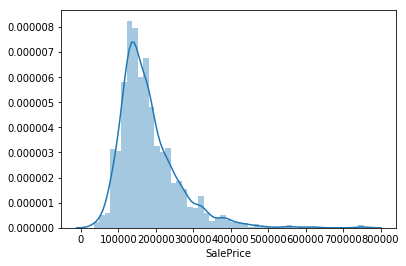

In [7]:
# Seabornを用いてヒストグラムで表示
sns.distplot(df_train['SalePrice']);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


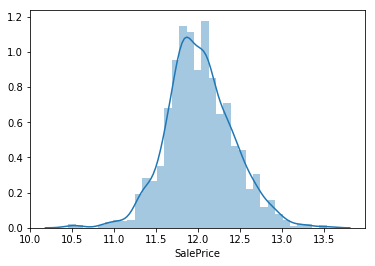

In [8]:
# SalePriceを対数変換をしておく
train_SalePrice_log = np.log(train["SalePrice"])
sns.distplot(train_SalePrice_log);

# データの前処理

In [9]:
# データタイプを確認
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## SalePriceと相関係数が大きい変数を確認
SalePriceと相関係数が0.5より大きい説明変数を選択してヒートマップを表示させることもできます。

In [10]:
# 相関係数行列を確認
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


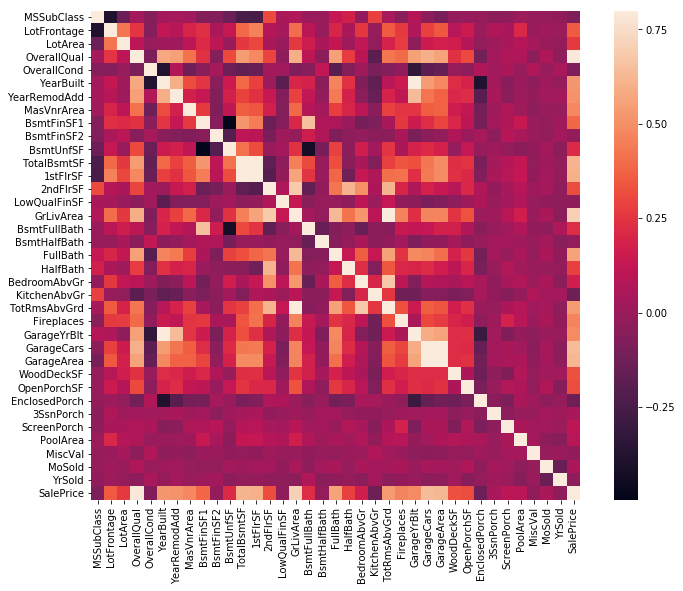

In [11]:
# 全変数のヒートマップを表示
corrmat = train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

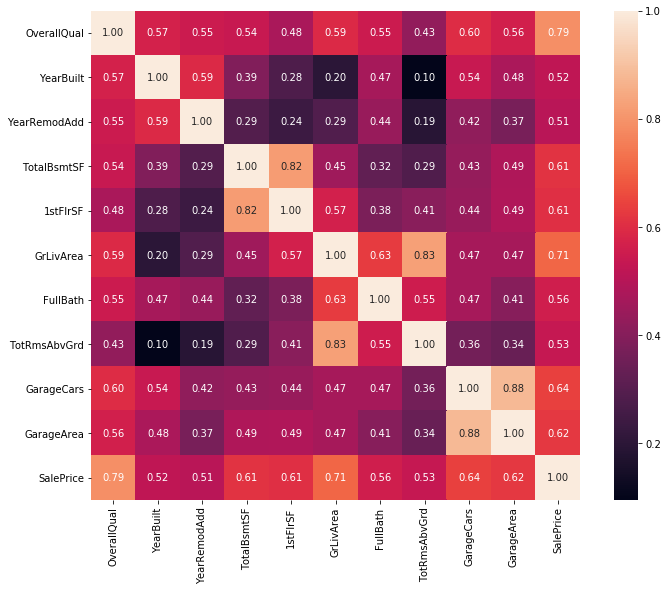

In [12]:
# SalePriceと0.5以上の相関係数をもつ変数を確認
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(12, 9))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,square=True, fmt='.2f')

* OverallQual:全体的な素材と仕上げの品質 0.790982
* GrLivArea：地上階の居室面積平方フィート 0.708624
* GarageCars:車庫の駐車台数 0.640409
* GarageArea:ガレージのサイズ（平方フィート） 0.623431 
* TotalBsmtSF：地階の総平方フィート 0.613581 
* 1stFlrSF:1階面積 0.605852
* FullBath: 地上階の合計浴室数 0.560664
* TotRmsAbvGrd:地上階の合計居室数(浴室除く) 0.533723
* YearBuilt:建築年 0.522897
* YearRemodAdd:改築年 0.507101

SalePriceと最も強い相関にあるOverallQualの内容を確認します。

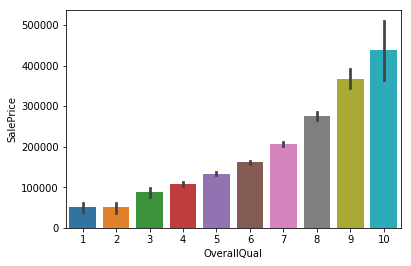

In [13]:
# seaborn.barplotをっ用いて平均値を高さ、信頼区間をエラーバーとして出力
sns.barplot(train.OverallQual,train.SalePrice)

In [14]:
# trainデータとtestデータを統合しておく
ntrain = train.shape[0]
ntest = test.shape[0]
train = train.drop("SalePrice", axis = 1)
all = pd.concat((train, test), sort = False)

In [15]:
print('testデータの大きさ' + str(all.shape))
print(all.isnull().sum())

testデータの大きさ(2919, 79)
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual

In [16]:
all_NA = (all.isnull().sum() / len(all)) * 100
all_NA = all_NA.drop(all_NA[all_NA == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_NA})
missing_data.head(10)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [17]:
# 欠損の多い説明変数6つを削除
all = all.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [18]:
# Garage関連の変数5つを削除
all = all.drop(['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'], axis=1)

In [19]:
# GarageCarsとGarageAreaの欠損値は0で埋める
all['GarageCars'] = all['GarageCars'].fillna(0)
all['GarageArea'] = all['GarageArea'].fillna(0)

In [20]:
# Bsmt関連の変数8つを削除
all = all.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF'], axis=1)

In [21]:
#　ベニヤ板関連の変数2つを削除
all["MasVnrType"] = all["MasVnrType"].fillna("None")
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)

In [22]:
# BsmtBathの欠損値は0で埋める
all['BsmtFullBath'] = all['BsmtFullBath'].fillna(0)
all['BsmtHalfBath'] = all['BsmtHalfBath'].fillna(0)

In [23]:
# 1stFlrSFと2ndFlrSFの合計はGrLivAreaなので1stFlrSFと2ndFlrSFを削除
all = all.drop(['1stFlrSF','2ndFlrSF'], axis=1)

In [24]:
# Utilities(利用可能なインフラ)はすべての住宅においてAllPubであるため、削除
all= all.drop(['Utilities'], axis=1)

In [25]:
# 欠損値の数が1～4個の変数も埋めておく
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])
all['Electrical'] = all['Electrical'].fillna(all['Electrical'].mode()[0])
all['KitchenQual'] = all['KitchenQual'].fillna(all['KitchenQual'].mode()[0])
all["Functional"] = all["Functional"].fillna("Typ")
all['SaleType'] = all['SaleType'].fillna(all['SaleType'].mode()[0])

In [26]:
# str型に変換
all['MSSubClass'] = all['MSSubClass'].apply(str)
all['OverallCond'] = all['OverallCond'].astype(str)
all['YrSold'] = all['YrSold'].astype(str)
all['MoSold'] = all['MoSold'].astype(str)

In [27]:
# trainデータとtestデータに再度分割
train = all[:ntrain]
test = all[ntrain:]

In [28]:
# ラベルエンコーダーを使ってカテゴリーデータにダミー変数を与える
# ラベルエンコーダーのインポート
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
# 説明変数の大きさを確認
print(train.shape)
print(test.shape)

(1460, 57)
(1459, 57)


In [30]:
# trainデータを確認
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,8450,1,3,3,4,0,5,2,...,61,0,0,0,0,0,4,2,8,4
1,5,3,9600,1,3,3,2,0,24,1,...,0,0,0,0,0,0,7,1,8,4
2,10,3,11250,1,0,3,4,0,5,2,...,42,0,0,0,0,0,11,2,8,4
3,11,3,9550,1,0,3,0,0,6,2,...,35,272,0,0,0,0,4,0,8,0
4,10,3,14260,1,0,3,2,0,15,2,...,84,0,0,0,0,0,3,2,8,4


ラベリングができていることを確認。
指定した説明変数が削除されていることを確認します。

# データの取り出し・標準化・分割

In [31]:
# X, yにデータを代入
X = train
# logを用いて正規分布に変換したSalePriceをyに代入
y = train_SalePrice_log

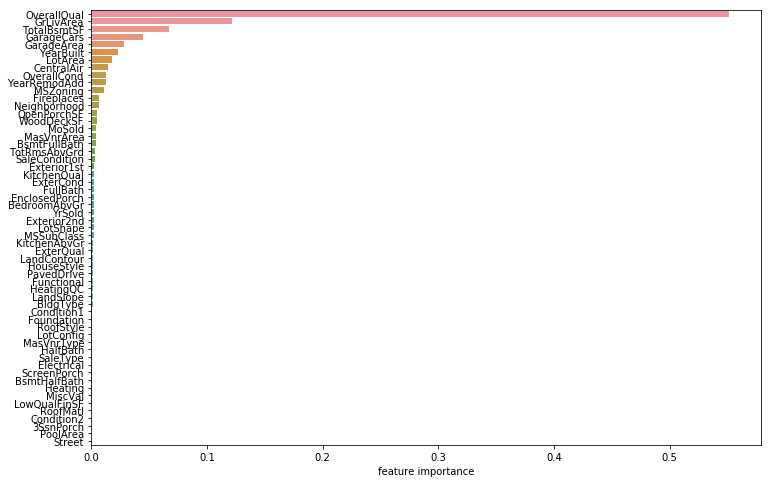

In [32]:
# ランダムフォレストをもちいる
# n_estimaors 決定木の個数
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1500)
rfr.fit(X,y)

# 重要度を順位づけしてグラフに出力
ranking_rfr = np.argsort(-rfr.feature_importances_)
plt.subplots(figsize=(12, 8))
sns.barplot(x=rfr.feature_importances_[ranking_rfr], y=X.columns.values[ranking_rfr], orient='h')
plt.xlabel('feature importance')
plt.show()

OverallQual、GrLivArea、TotalBsmtSF、GarageCarsの順に重要な変数となっています。
このGrLivArea、TotalBsmtSFとSalePriceの散布図を表示します。

<function matplotlib.pyplot.show(*args, **kw)>

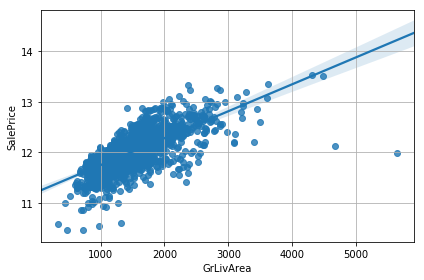

In [33]:
# GrLivAreaとSalePriceの散布図
sns.regplot(x=X['GrLivArea'],y=y)
plt.tight_layout()
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

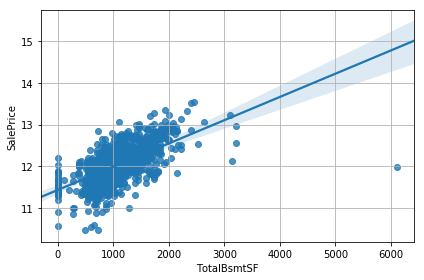

In [34]:
# TotalBsmtSFとSalePriceの散布図
sns.regplot(x=X['TotalBsmtSF'],y=y)
plt.tight_layout()
plt.grid()
plt.show

GrLivArea、TotalBsmtSFの外れ値を削除します。

In [35]:
# 外れ値を削除
Xmat = X
Xmat['SalePrice'] = y
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>4000) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['TotalBsmtSF']>6000) & (Xmat['SalePrice']<12.5)].index)

# 再びXとyに分割
y = Xmat.loc[:, ['SalePrice']].values.reshape(-1,1)
X = Xmat.drop(['SalePrice'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# モデリングの実行

In [36]:
# ホールド・アウト法による分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 重回帰分析による予測

In [37]:
# 重回帰線形モデルの学習
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# 定数項と偏回帰係数を出力
print(lr.intercept_)
print(lr.coef_)

[5.51803307]
[[ 2.39618046e-03 -1.99225187e-02  2.97849929e-06  3.78793646e-01
  -7.55676147e-03 -1.16520593e-02 -1.66895894e-04 -5.20491398e-03
  -2.24042455e-04  6.64210715e-03 -1.42431663e-02 -8.74161571e-03
  -1.53152251e-03  5.38141109e-02  4.49716568e-02  1.86485355e-03
   5.19098554e-04  3.98547043e-03  3.55195135e-03 -5.19130524e-03
   4.33163838e-03  1.13835696e-02  6.02118108e-05 -9.80118963e-03
   1.25634435e-02  9.77583188e-03  1.36878250e-04 -1.42930349e-02
  -8.75175222e-03  9.50892702e-02  1.55007011e-03 -2.02120031e-04
   2.52058964e-04  6.58106465e-02  3.00735098e-02  2.27113789e-02
   1.43375501e-02 -2.57814166e-02 -6.40653784e-02 -2.74423580e-02
   9.88025720e-03  2.14895424e-02  3.29326390e-02  3.14422341e-02
   8.02100503e-05  2.80386539e-02  6.75576998e-05  6.36886534e-05
   3.31002304e-05  1.86726592e-04  3.12689846e-04  1.89687324e-04
   2.96449553e-06  1.77177429e-03 -5.27041950e-03 -1.24819064e-03
   2.46827988e-02]]


In [39]:
# 自由度調整済み決定係数
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

# 自由度調整済み決定係数を出力
print('重回帰分析/adjusted R^2：自由度調整済み決定係数')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

print('')

# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('重回帰分析/RMSE:モデルが正解からどれだけズレるかを表す指標')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

重回帰分析/adjusted R^2：自由度調整済み決定係数
train: 0.916517
test : 0.904165

重回帰分析/RMSE:モデルが正解からどれだけズレるかを表す指標
train: 0.114
test : 0.127


In [40]:
# 重回帰線形モデルの学習
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### ランダムフォレスト

In [41]:
# ランダムフォレストで再度学習
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
# 自由度調整済み決定係数を出力
print('ランダムフォレスト/adjusted R^2：自由度調整済み決定係数')
print('train: %3f' % adjusted(rfr.score(X_train, y_train), len(y), 2))
print('test : %3f' % adjusted(rfr.score(X_test, y_test), len(y_test), 2))

print('')

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('ランダムフォレスト/RMSE:モデルが正解からどれだけズレるかを表す指標')
print('train: %.3f' % (mse(y_train, rfr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, rfr.predict(X_test)) ** (1/2)))

ランダムフォレスト/adjusted R^2：自由度調整済み決定係数
train: 0.982473
test : 0.893370

ランダムフォレスト/RMSE:モデルが正解からどれだけズレるかを表す指標
train: 0.052
test : 0.134


In [43]:
# ランダムフォレストモデルの学習
rfr.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### GBoost

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


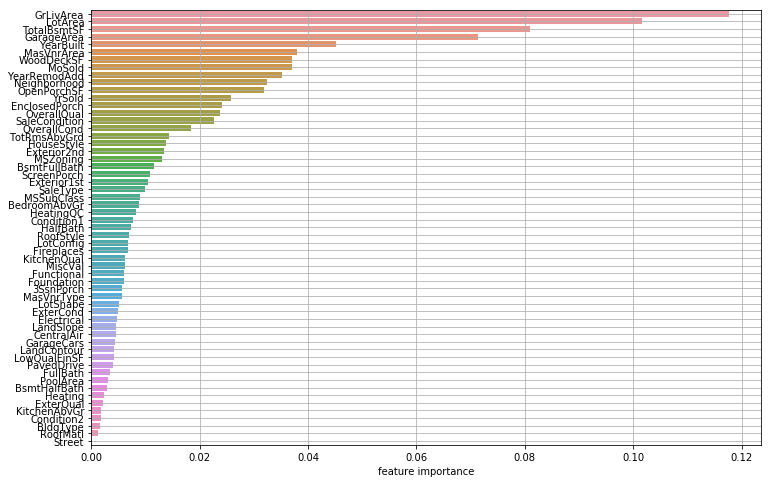

In [44]:
# 勾配ブースティング木をもちいる
# n_estimaors 決定木の個数
# learning_rate 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
# max_depth ひとつひとつの決定木の深さ
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.1,max_depth=3)
GBoost.fit(X,y)

# 重要度を順位づけしてグラフに出力
ranking_GB = np.argsort(-GBoost.feature_importances_)
plt.subplots(figsize=(12, 8))
sns.barplot(x=GBoost.feature_importances_[ranking_GB], y=X.columns.values[ranking_GB], orient='h')
plt.xlabel('feature importance')
plt.grid()
plt.show()

In [45]:
# 勾配ブースティング木で学習
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3)
GBoost.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [46]:
# 自由度調整済み決定係数を出力
print('GBoost/adjusted R^2：自由度調整済み決定係数')
print('train: %3f' % adjusted(GBoost.score(X_train, y_train), len(y), 2))
print('test : %3f' % adjusted(GBoost.score(X_test, y_test), len(y_test), 2))

print('')

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('GBoost/RMSE:モデルが正解からどれだけズレるかを表す指標')
print('train: %.3f' % (mse(y_train, GBoost.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, GBoost.predict(X_test)) ** (1/2)))

GBoost/adjusted R^2：自由度調整済み決定係数
train: 0.998416
test : 0.908296

GBoost/RMSE:モデルが正解からどれだけズレるかを表す指標
train: 0.016
test : 0.124


In [47]:
# GBoostモデルの学習
GBoost.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## その他の手法

# 配布されたテストデータで予測・提出

In [48]:
# それぞれのモデルを用いて提出用データを予測
lr_pred = lr.predict(test)
rfr_pred = rfr.predict(test)
GBoost_pred = GBoost.pred(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
ensemble = np.exp(lr_pred*0.5 + rfr_pred*0.25 + GBoost*0.25)

In [ ]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : test_Id, 'SalePrice' : ensemble.reshape(-1)})
submit_file.to_csv('submit.csv', index = False)

In [ ]:
# 適切に出力できているか確認
submit_file.head()